<a href="https://colab.research.google.com/github/Nishan-Charlie/Her2_Histopathology/blob/main/ResNet152_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import AUC
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import accuracy_score

# numpy
import numpy as np

# Ploting
import matplotlib.pyplot as plt

# System
import os
import shutil
import random
import glob
import itertools

# Warnings
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)
%matplotlib inline
random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
new_train_path = '/content/drive/MyDrive/Medical Imaging/BCI_binary/IHC/train'

new_test_path = '/content/drive/MyDrive/Medical Imaging/BCI_binary/IHC/test'

In [ ]:
dataGenerator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.7,
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.1
)



train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
   rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.1).flow_from_directory(directory=new_train_path, target_size=(224, 224),  batch_size=32,class_mode='binary')


valid_batches = dataGenerator.flow_from_directory(directory= new_test_path, target_size = (224,224),batch_size = 16,class_mode='binary',subset='validation')
test_batches = dataGenerator.flow_from_directory(directory = new_test_path, target_size=(224,224),batch_size = 16, shuffle = False,class_mode='binary',subset='training')

Found 3896 images belonging to 2 classes.
Found 683 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet152
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Sequential

# Instantiate the ResNet101 base model
ResNet152_base = ResNet152(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

# Display the architecture of the ResNet101 model
ResNet152_base.summary()

# Create the model
model = Sequential()
model.add(ResNet152_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Display the model summary
# model.summary()

234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "resnet152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 58,370,944 (222.67 MB)

 Trainable params: 58,219,520 (222.09 MB)

 Non-trainable params: 151,424 (591.50 KB)

In [ ]:
for layer in ResNet152_base.layers[:120]:
   layer.trainable = False

print('conv_base is now NOT trainable')

conv_base is now NOT trainable


In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',   # Can also monitor 'val_accuracy'
                               patience=10,          # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restores the model weights from the epoch with the best value of the monitored quantity


# Define ReduceLROnPlateau callback
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',    # Can also monitor 'val_accuracy'
                                 factor=0.5,            # Factor by which the learning rate will be reduced
                                 patience=5,            # Number of epochs with no improvement after which learning rate will be reduced
                                 min_lr=1e-6)           # Lower bound on the learning rate


In [ ]:
history = model.fit(x= train_batches, validation_data = valid_batches, verbose = 1,epochs=100, callbacks=[early_stopping, lr_scheduler])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


122/122 ━━━━━━━━━━━━━━━━━━━━ 1588s 12s/step - accuracy: 0.6656 - loss: 3.2349 - val_accuracy: 0.7218 - val_loss: 2.3435 - learning_rate: 1.0000e-04
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.7049 - loss: 2.2582 - val_accuracy: 0.7540 - val_loss: 2.1267 - learning_rate: 1.0000e-04
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.7589 - loss: 2.1285 - val_accuracy: 0.7848 - val_loss: 2.1222 - learning_rate: 1.0000e-04
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.7952 - loss: 2.0458 - val_accuracy: 0.8199 - val_loss: 2.0484 - learning_rate: 1.0000e-04
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8324 - loss: 1.8900 - val_accuracy: 0.8433 - val_loss: 1.8365 - learning_rate: 1.0000e-04
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.8370 - loss: 1.8304 - val_accuracy: 0.8697 - val_loss: 1.8008 - learning_rate: 1.0000e-04
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accura

In [ ]:
model_folder = "/content/drive/MyDrive/Medical Imaging/Model folder"
model.save(model_folder+"/iHC_My_Binary_resnet_152.h5")

In [ ]:

import json

history_dict_res50 = history.history

file_path = os.path.join(model_folder, 'resnet_101_IHC_My_binary_data_history.json')
with open(file_path, 'w') as f:
    json.dump(history_dict_res50, f)


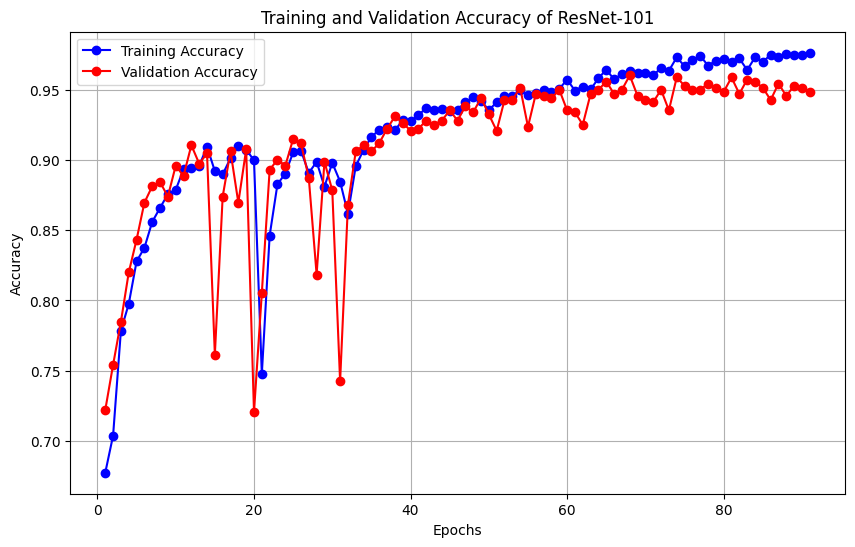

In [ ]:
# Extract training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create a range of epochs
epochs = range(1, len(training_accuracy)+1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of ResNet-101')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

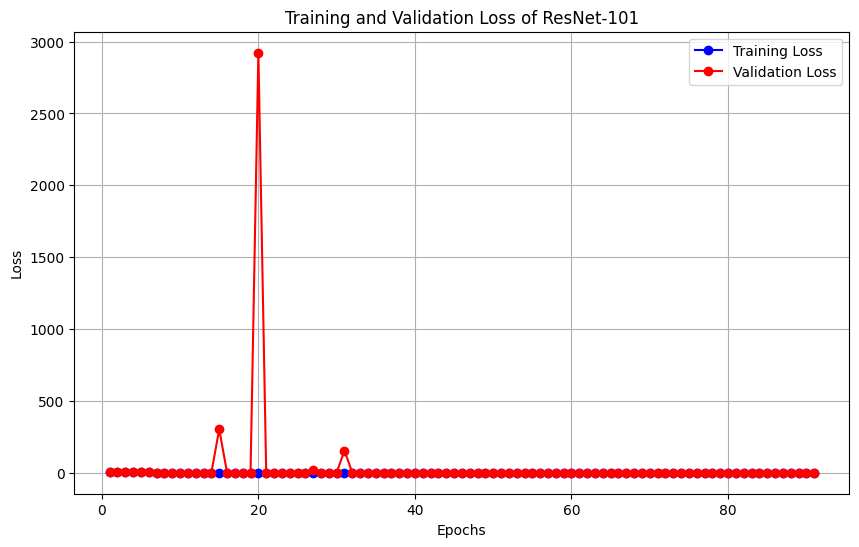

In [ ]:

# Extract training and validation accuracy
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a range of epochs
epochs = range(1, len(training_loss)+1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss of ResNet-101')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_batches)
print("Testing Loss:", test_loss)
#print("AUC", AUC)
print("Testing Accuracy:", test_accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 189s 10s/step - accuracy: 0.9497 - loss: 0.2529
Testing Loss: 0.18921472132205963
Testing Accuracy: 0.9727891087532043


In [ ]:
# Function for threshold filtering
def threshold_filtering(predictions, threshold=0.8):
    filtered_preds = []
    for pred in predictions:
        if pred > threshold or pred < (1 - threshold):
            filtered_preds.append(pred)
        else:
            filtered_preds.append(None)  # Indicates uncertainty
    return filtered_preds

# Evaluate with threshold filtering
def evaluate_with_threshold(model, test_batches, threshold=0.8):
    raw_predictions = model.predict(test_batches)
    y_true = test_batches.labels
    filtered_predictions = threshold_filtering(raw_predictions, threshold)

    filtered_preds = [pred for pred in filtered_predictions if pred is not None]
    filtered_y_true = [y for i, y in enumerate(y_true) if filtered_predictions[i] is not None]

    if filtered_preds:
        binary_preds = [1 if pred > 0.7 else 0 for pred in filtered_preds]
        accuracy = accuracy_score(filtered_y_true, binary_preds)
        print(f"Accuracy on confident predictions: {accuracy:.4f}")
        print(f"Number of uncertain predictions: {len(y_true) - len(filtered_preds)}")
    else:
        print("No predictions passed the confidence threshold.")

# Example Usage:
evaluate_with_threshold(model, test_batches, threshold=0.8)


19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 866ms/step
Accuracy on confident predictions: 0.9815
Number of uncertain predictions: 23


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 334ms/step


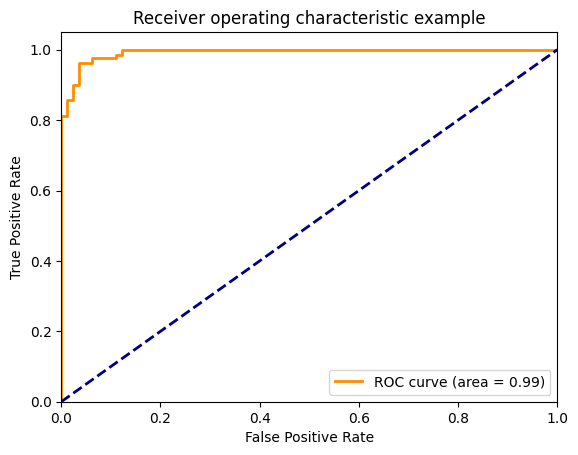

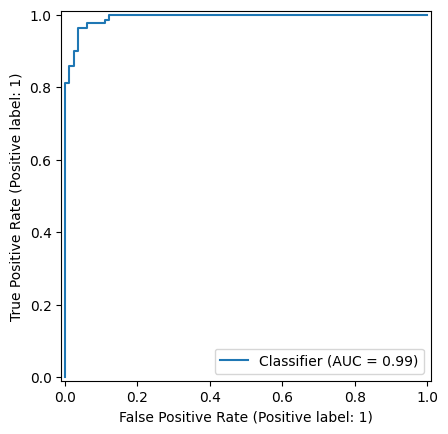

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get predictions
y_pred = model.predict(test_batches)

# Get true labels
y_true = test_batches.labels

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred[:])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Display ROC curve using sklearn
RocCurveDisplay.from_predictions(y_true, y_pred[:])
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step


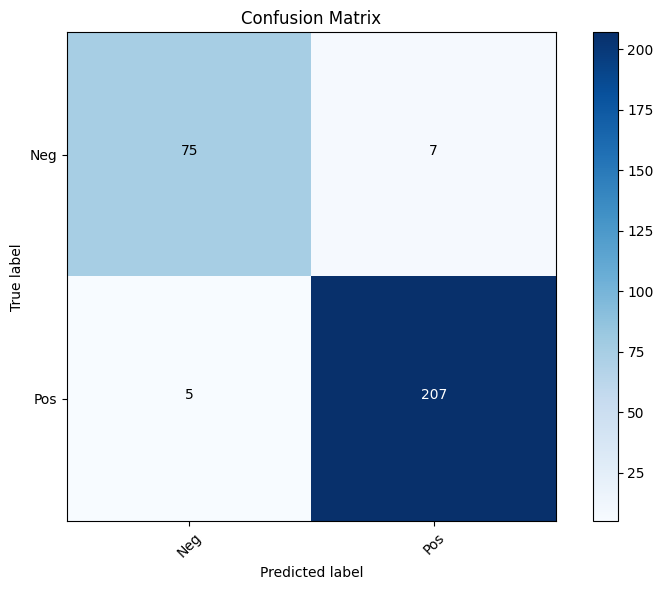

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Get predictions
y_pred = model.predict(test_batches)

# Get true labels
y_true = test_batches.labels

# Convert probabilities to binary labels using a threshold of 0.5
y_pred_labels = (y_pred > 0.5).astype(int).flatten()


# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

def plot_confusion_matrix(cm, classes,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(cm, classes=["Neg", "Pos"])


##HER2 H&E

In [ ]:
train_he_path = '/content/drive/MyDrive/Medical Imaging/BCI_binary/HE/train'
test_he_path = '/content/drive/MyDrive/Medical Imaging/BCI_binary/HE/test'

In [ ]:
dataGenerator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    validation_split=0.7,
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.1
)



train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
   rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.1).flow_from_directory(directory=train_he_path, target_size=(224, 224),  batch_size=32,class_mode='binary')


valid_batches = dataGenerator.flow_from_directory(directory= test_he_path, target_size = (224,224),batch_size = 16,class_mode='binary',subset='validation')
test_batches = dataGenerator.flow_from_directory(directory = test_he_path, target_size=(224,224),batch_size = 16, shuffle = False,class_mode='binary',subset='training')

Found 3896 images belonging to 2 classes.
Found 683 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
for layer in ResNet152_base.layers[:140]:
   layer.trainable = False

print('conv_base is now NOT trainable')

conv_base is now NOT trainable


In [ ]:
history = model.fit(x= train_batches, validation_data = valid_batches, verbose = 1,epochs=100, callbacks=[early_stopping, lr_scheduler])

In [ ]:
# Extract training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create a range of epochs
epochs = range(1, len(training_accuracy)+1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of ResNet-101')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Extract training and validation accuracy
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a range of epochs
epochs = range(1, len(training_loss)+1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss of ResNet-101')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get predictions
y_pred = model.predict(test_batches)

# Get true labels
y_true = test_batches.labels

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred[:])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Display ROC curve using sklearn
RocCurveDisplay.from_predictions(y_true, y_pred[:])
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Get predictions
y_pred = model.predict(test_batches)

# Get true labels
y_true = test_batches.labels

# Convert probabilities to binary labels using a threshold of 0.5
y_pred_labels = (y_pred > 0.5).astype(int).flatten()


# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

def plot_confusion_matrix(cm, classes,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(cm, classes=["Neg", "Pos"])
